In [2]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
cars=pd.read_csv('used cars.csv')
cars.head()

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
0,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,13495
1,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,16500
2,alfa-romero,gas,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,9.0,154,19,26,16500
3,audi,gas,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,70.0,102,24,30,13950
4,audi,gas,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,8.0,115,18,22,17450


## what is the most popular cars for customers

### cleaning data

In [7]:
cars['num_of_doors'].unique()

array(['two', 'four', nan], dtype=object)

In [10]:
cars['num_of_cylinders']=cars['num_of_cylinders'].str.replace('tow','two')

In [11]:
cars['drive_wheels'].unique()

array(['rwd', 'fwd', '4wd ', '4wd'], dtype=object)

In [13]:
cars['drive_wheels']=cars['drive_wheels'].str.strip()

In [14]:
cars['drive_wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [15]:
cars['fuel_type'].unique()

array(['gas', 'diesel'], dtype=object)

In [16]:
cars.head()

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
0,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,13495
1,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,16500
2,alfa-romero,gas,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,9.0,154,19,26,16500
3,audi,gas,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,70.0,102,24,30,13950
4,audi,gas,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,8.0,115,18,22,17450


## length shoud be between 141.1 and 208.1

In [17]:
cars['length'].min()

np.float64(141.1)

In [18]:
cars['length'].max()

np.float64(208.1)

In [21]:
cars.isna().any(axis=0)

make                 False
fuel_type            False
num_of_doors          True
body_style           False
drive_wheels         False
engine_location      False
wheel_base           False
length               False
width                False
height               False
curb_weight          False
engine_type          False
num_of_cylinders     False
engine_size          False
fuel_system          False
compression_ratio    False
horsepower           False
city_mpg             False
highway_mpg          False
price                False
dtype: bool

In [24]:
cars[cars['num_of_doors'].isna()]

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
27,dodge,gas,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,7.6,102,24,30,8558
63,mazda,diesel,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,22.7,64,36,42,10795


In [26]:

cars['num_of_doors'].fillna('four',inplace=True)

In [27]:
cars['num_of_doors'].unique()

array(['two', 'four'], dtype=object)

### now lets describe data

In [28]:
cars.describe()

,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,horsepower,city_mpg,highway_mpg,price
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,98.782759,173.999015,65.901478,53.733498,2555.921182,126.857143,10.452315,104.256158,25.241379,30.748768,12982.477833
std,6.045680,12.385511,2.154835,2.442864,523.205555,41.845239,5.792528,39.714369,6.570702,6.920406,8111.953571
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,48.000000,13.000000,16.000000,0.000000
25%,94.500000,166.300000,64.050000,52.000000,2145.000000,97.000000,8.550000,70.000000,19.000000,25.000000,7649.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,119.000000,9.000000,95.000000,24.000000,30.000000,10245.000000
75%,102.400000,183.300000,66.900000,55.500000,2943.500000,143.000000,9.400000,116.000000,30.000000,35.000000,16500.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,70.000000,288.000000,49.000000,54.000000,45400.000000


In [29]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               203 non-null    object 
 1   fuel_type          203 non-null    object 
 2   num_of_doors       203 non-null    object 
 3   body_style         203 non-null    object 
 4   drive_wheels       203 non-null    object 
 5   engine_location    203 non-null    object 
 6   wheel_base         203 non-null    float64
 7   length             203 non-null    float64
 8   width              203 non-null    float64
 9   height             203 non-null    float64
 10  curb_weight        203 non-null    int64  
 11  engine_type        203 non-null    object 
 12  num_of_cylinders   203 non-null    object 
 13  engine_size        203 non-null    int64  
 14  fuel_system        203 non-null    object 
 15  compression_ratio  203 non-null    float64
 16  horsepower         203 non

### compression_ratio should be between 7 to 23

In [30]:
cars['compression_ratio'].min()

np.float64(7.0)

In [31]:
cars['compression_ratio'].max()

np.float64(70.0)

In [32]:
cars[cars['compression_ratio']>23]

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
3,audi,gas,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,70.0,102,24,30,13950


In [35]:
cars['compression_ratio']=cars['compression_ratio'].replace(70.0,7.0)

In [36]:
cars['compression_ratio'].max()

np.float64(23.0)

## now what are the most 5 popular cars with customers

In [37]:
cars.head()

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
0,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,13495
1,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,16500
2,alfa-romero,gas,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,9.0,154,19,26,16500
3,audi,gas,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,7.0,102,24,30,13950
4,audi,gas,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,8.0,115,18,22,17450


<Axes: xlabel='make'>

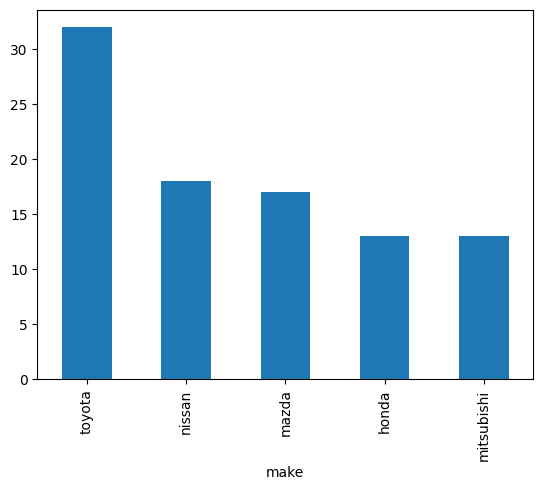

In [42]:
cars.groupby('make').count()['num_of_doors'].nlargest(5).plot.bar()

## why toyota is the most popular car

### compare price for each car

<Axes: xlabel='make'>

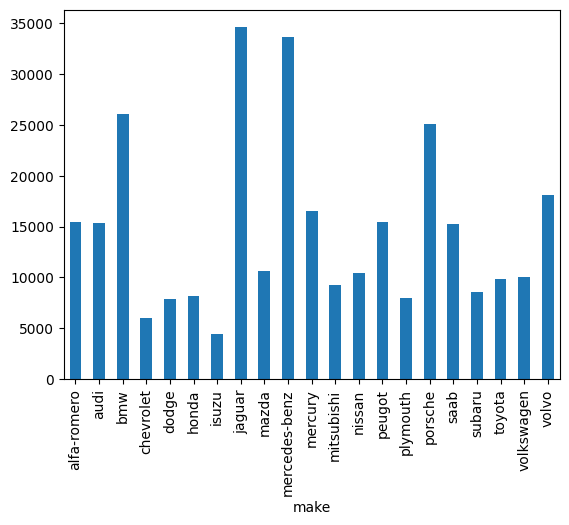

In [45]:
cars.groupby('make').mean(numeric_only=True)['price'].plot.bar()

In [ ]:
cars

,make,fuel_type,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,compression_ratio,horsepower,city_mpg,highway_mpg,price
0,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,13495
1,alfa-romero,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,9.0,111,21,27,16500
2,alfa-romero,gas,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,9.0,154,19,26,16500
3,audi,gas,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,7.0,102,24,30,13950
4,audi,gas,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,8.0,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,volvo,gas,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,9.5,114,23,28,16845
199,volvo,gas,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,8.7,160,19,25,19045
200,volvo,gas,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,8.8,134,18,23,21485
201,volvo,diesel,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,23.0,106,26,27,22470


<Axes: xlabel='make'>

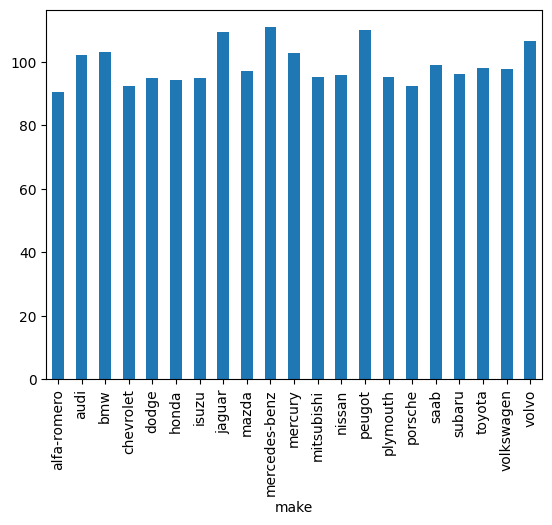

In [47]:
cars.groupby('make').mean(numeric_only=True)['wheel_base'].plot.bar()

### lets focus on toyota and nissan and mazda

<Axes: xlabel='make'>

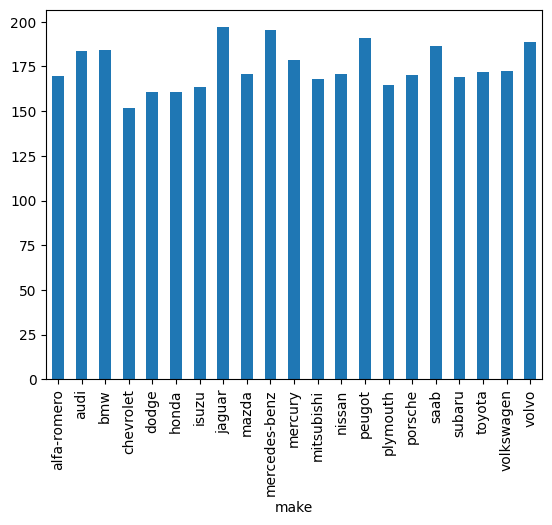

In [48]:
cars.groupby('make').mean(numeric_only=True)['length'].plot.bar()


<Axes: xlabel='make'>

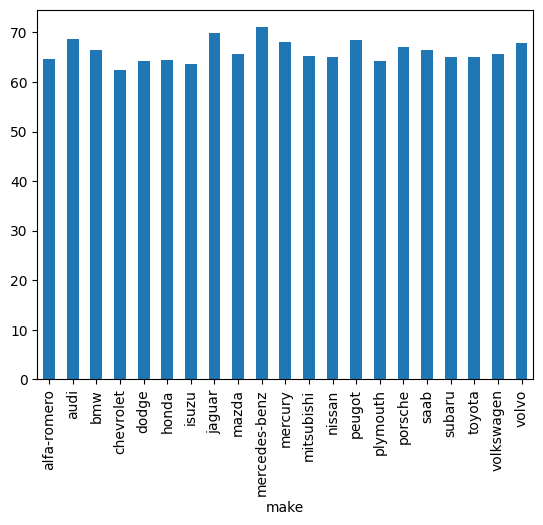

In [49]:
cars.groupby('make').mean(numeric_only=True)['width'].plot.bar()

<Axes: xlabel='make'>

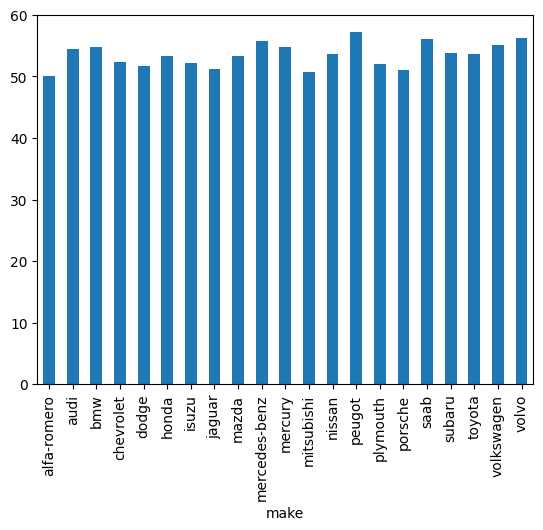

In [50]:
cars.groupby('make').mean(numeric_only=True)['height'].plot.bar()


<Axes: xlabel='make'>

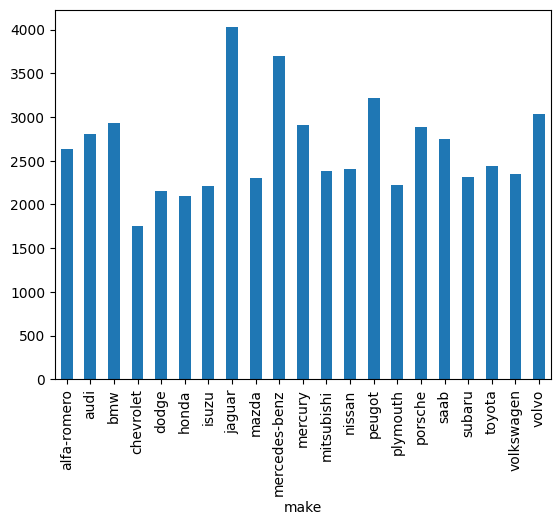

In [51]:
cars.groupby('make').mean(numeric_only=True)['curb_weight'].plot.bar()

### price and curb_weight extremely affect on cars sales

<Axes: xlabel='make'>

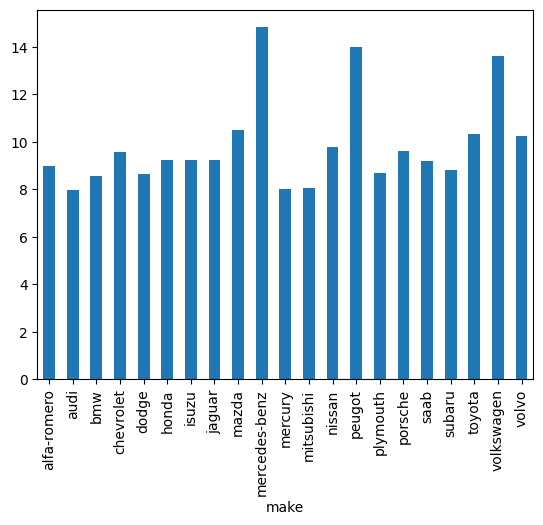

In [56]:
cars.groupby('make').mean(numeric_only=True)['compression_ratio'].plot.bar()

<Axes: xlabel='make'>

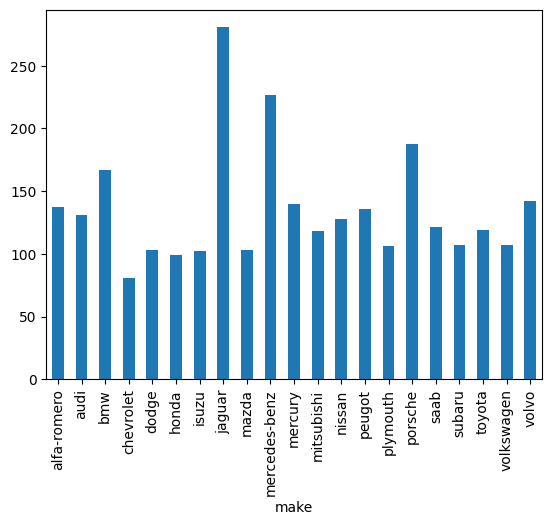

In [57]:
cars.groupby('make').mean(numeric_only=True)['engine_size'].plot.bar()

<Axes: xlabel='make'>

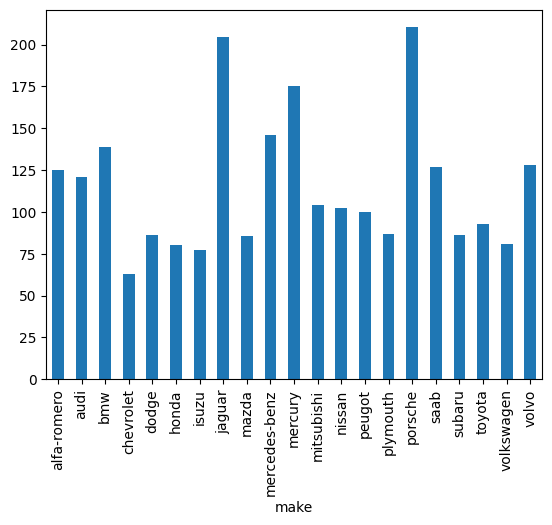

In [55]:
cars.groupby('make').mean(numeric_only=True)['horsepower'].plot.bar()

<Axes: xlabel='make'>

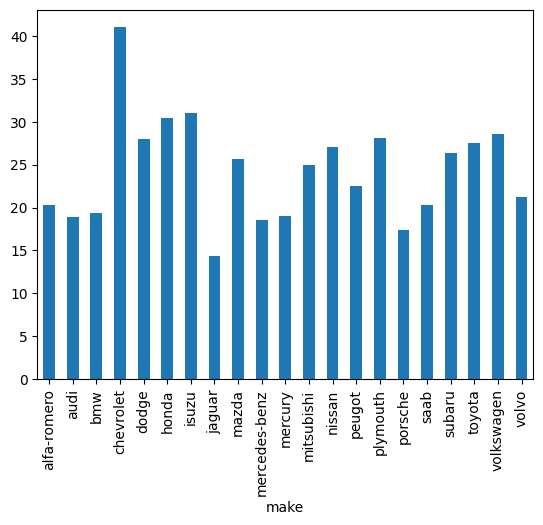

In [54]:
cars.groupby('make').mean(numeric_only=True)['city_mpg'].plot.bar()

<Axes: xlabel='make'>

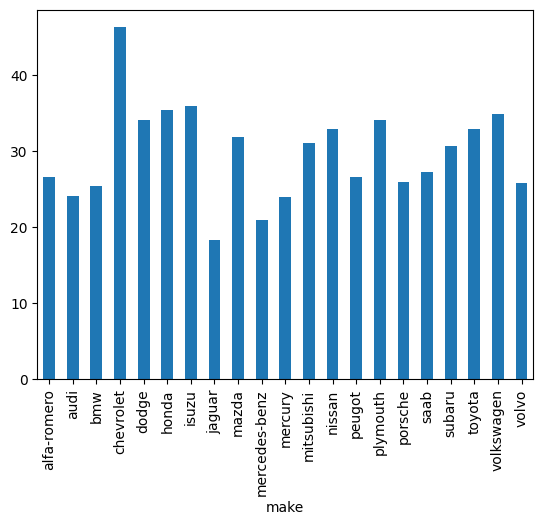

In [53]:
cars.groupby('make').mean(numeric_only=True)['highway_mpg'].plot.bar()

In [60]:
cars[cars['make']=='toyota'][['highway_mpg','city_mpg','horsepower','engine_size','compression_ratio','curb_weight','price']].mean()

highway_mpg            32.906250
city_mpg               27.500000
horsepower             92.781250
engine_size           118.812500
compression_ratio      10.340625
curb_weight          2441.093750
price                9885.812500
dtype: float64

# conclusion 

### the last cell express the best specifications 